<a href="https://colab.research.google.com/github/esferita006/Codigos_de_varias_materias/blob/main/Reservas_ejercicio_3_finanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS DE FINANZAS</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Acontinuacon se presentan algunos ejercicios de Reservas </i></h5>
</font>

#**Métodos de Reservas**


##METODO ESTATUTARIO


1) Con la base primas y siniestralidad RRC deben crear una reserva RRC bajo el método estatutario,
se deben de realizar 60 mil simulaciones para estimar los factores BEL, se tomará como periodos
de origen a la fecha de inicio de vigencia y como periodos de desarrollo el registro contable.



In [ ]:
from google.colab import files
files.upload()


In [ ]:
from google.colab import files
files.upload()

Saving Prima_Hist.csv to Prima_Hist.csv


In [ ]:
import pandas as pd
import numpy as np

# Función para cargar y limpiar datos
def cargar_datos(filepath, fecha_col, formatear_cols):
    df = pd.read_csv(filepath)
    df = df[df[fecha_col] != '24/09/8021']
    for col in formatear_cols:
        df[col] = pd.to_datetime(df[col], format='%d/%m/%Y')
    return df

df_siniestralidad = cargar_datos("Siniestralidad_RRC.csv", 'Fch IniVig', ['Fch Contable', 'Fch IniVig'])
df_primas = cargar_datos("Prima_Hist.csv", 'Fch IniVig', ['Fch IniVig', 'Fch FinVig'])

# Solicitar ramo específico
ramo_especifico = input("Ingrese el ramo específico: ")

# Filtrar por ramo específico
df_ramo = df_siniestralidad[df_siniestralidad['RAMOS'] == ramo_especifico]

# Crear triángulo de siniestralidad
df_ramo['Año Origen'] = df_ramo['Fch IniVig'].dt.year
df_ramo['Año Desarrollo'] = df_ramo['Fch Contable'].dt.year - df_ramo['Fch IniVig'].dt.year
triangulo = pd.pivot_table(df_ramo, index='Año Origen', columns='Año Desarrollo', values='Siniestralidad', aggfunc=np.sum).fillna(0).sort_index(axis=1)

# Asegurar que las columnas necesarias existen
for col in range(8):
    if col not in triangulo.columns:
        triangulo[col] = 0
triangulo = triangulo.sort_index(axis=1)

# Añadir columnas necesarias en df_primas
df_primas['Año Ocurrencia'] = df_primas['Fch IniVig'].dt.year

# Calcular primas por año y ramo
primas_por_año_y_ramo = df_primas.groupby(['Año Ocurrencia', 'RAMOS'])['Prima'].sum()
años = list(range(2016, 2024))
primas_ramo_e = df_primas[(df_primas['RAMOS'] == ramo_especifico) & (df_primas['Año Ocurrencia'].isin(años))]
primas_por_ramo = primas_ramo_e.groupby('Año Ocurrencia')['Prima'].sum()

# Asegurarse de que los índices coincidan
triangulo.index = triangulo.index.astype(int)
primas_por_ramo.index = primas_por_ramo.index.astype(int)

# Dividir el triángulo por las primas emitidas
triangulo_factores = triangulo.div(primas_por_ramo, axis=0)

# Simulación de datos faltantes
def simulacion(triangulo_factores):
    for col in range(1, 7):
        for row in range(8 - col, 8):
            triangulo_factores.iloc[row, col] = np.random.choice(triangulo_factores.iloc[:8 - col, col])
    triangulo_factores['Fsi'] = triangulo_factores.sum(axis=1)
    return triangulo_factores['Fsi'].tolist()

# Realizar simulaciones
sumas_listas = [simulacion(triangulo_factores.copy()) for _ in range(60)]

# Calcular BEL
df_suma = pd.DataFrame(sumas_listas)
total_sum = df_suma.sum().sum()
FS_BEL = total_sum / (8 * 60)

print(FS_BEL)


##TRIANGULO DE DESARROLLO

In [ ]:
import pandas as pd
import numpy as np

# Función para cargar y limpiar datos
def cargar_datos(filepath, fecha_col, formatear_cols):
    df = pd.read_csv(filepath)
    df = df[df[fecha_col] != '24/09/8021']
    for col in formatear_cols:
        df[col] = pd.to_datetime(df[col], format='%d/%m/%Y')
    return df

# Cargar datos de siniestralidad
df_siniestralidad = cargar_datos("Siniestralidad_RRC.csv", 'Fch IniVig', ['Fch Contable', 'Fch IniVig'])

# Filtrar por el ramo específico
ramo_especifico = 'INCENDIO'
df_ramo = df_siniestralidad[df_siniestralidad['RAMOS'] == ramo_especifico]

# Crear triángulo de siniestralidad
df_ramo['Año Origen'] = df_ramo['Fch IniVig'].dt.year
df_ramo['Año Desarrollo'] = df_ramo['Fch Contable'].dt.year - df_ramo['Fch IniVig'].dt.year

# Crear tabla pivote y llenar valores faltantes con 0
triangulo = pd.pivot_table(df_ramo, index='Año Origen', columns='Año Desarrollo', values='Siniestralidad', aggfunc=np.sum).fillna(0).sort_index(axis=1)

# Asegurar que las columnas necesarias existen y están ordenadas
for col in range(8):
    if col not in triangulo.columns:
        triangulo[col] = 0
triangulo = triangulo.sort_index(axis=1)

# Mostrar el triángulo de siniestralidad
print(triangulo)


##TRIANGULO DE ACUMULACION


In [ ]:
# Triángulo de siniestralidad acumulada 'INCENDIO'
triangulo_acumulado = triangulo.cumsum(axis=1)

triangulo_acumulado
#print(triangulo_acumulado)

Año Desarrollo,0,1,2,3,4,5,6,7
Año Origen,,,,,,,,
2016,4.472110e+09,5.371701e+09,4.681884e+09,4.685482e+09,4.685935e+09,4.685558e+09,4.685558e+09,4.685558e+09
2017,1.883124e+08,3.801925e+08,3.800659e+08,3.879046e+08,3.904780e+08,3.910681e+08,3.910681e+08,3.910681e+08
2018,7.651216e+08,7.579043e+08,7.902670e+08,7.823170e+08,7.830505e+08,7.830504e+08,7.830504e+08,7.830504e+08
2019,1.285732e+08,1.862489e+08,1.843950e+08,1.526050e+08,1.530309e+08,1.530309e+08,1.530309e+08,1.530309e+08
2020,8.646993e+07,1.775687e+08,1.910248e+08,1.794353e+08,1.794353e+08,1.794353e+08,1.794353e+08,1.794353e+08
2021,3.872424e+08,5.413792e+08,5.305155e+08,5.305155e+08,5.305155e+08,5.305155e+08,5.305155e+08,5.305155e+08
2022,6.639145e+08,1.034488e+09,1.034488e+09,1.034488e+09,1.034488e+09,1.034488e+09,1.034488e+09,1.034488e+09
2023,9.605362e+07,9.605362e+07,9.605362e+07,9.605362e+07,9.605362e+07,9.605362e+07,9.605362e+07,9.605362e+07


In [ ]:
# Cargar y procesar datos de primas
primas_df = cargar_datos('Prima_Hist.csv', 'Fch IniVig', ['Fch IniVig', 'Fch FinVig'])

# Crear nuevas columnas para el año de ocurrencia y año contable
primas_df['Año Ocurrencia'] = primas_df['Fch IniVig'].dt.year
primas_df['Año Contable'] = primas_df['Fch FinVig'].dt.year

# Calcular primas por año de ocurrencia
primas_por_año = primas_df.groupby('Año Ocurrencia')['Prima'].sum()

# Calcular primas por año de ocurrencia y ramo
primas_por_año_y_ramo = primas_df.groupby(['Año Ocurrencia', 'RAMOS'])['Prima'].sum()

# Filtrar primas para el ramo "INCENDIO" entre los años 2016 y 2024
años = list(range(2016, 2024))
primas_ramo_incendio = primas_df[(primas_df['RAMOS'] == ramo_especifico) & (primas_df['Año Ocurrencia'].isin(años))]

# Calcular primas emitidas para el ramo "INCENDIO"
primas_rincendio = primas_ramo_incendio.groupby('Año Ocurrencia')['Prima'].sum()

# Asegurarse de que los índices de ambos DataFrames coincidan
triangulo.index = triangulo.index.astype(int)
primas_rincendio.index = primas_rincendio.index.astype(int)

# Dividir el triángulo de siniestralidad entre las primas emitidas
triangulo_factores = triangulo.div(primas_rincendio, axis=0)

# Mostrar el triángulo de factores
print(triangulo_factores)

Año Desarrollo          0         1         2         3         4  \
Año Origen                                                          
2016            14.600970  2.937069 -2.252179  0.011745  0.001480   
2017             0.475543  0.484553 -0.000320  0.019795  0.006499   
2018             2.130378 -0.020095  0.090109 -0.022136  0.002042   
2019             0.309396  0.138790 -0.004461 -0.076499  0.001025   
2020             0.171664  0.180853  0.026714 -0.023008  0.000000   
2021             0.737956  0.293734 -0.020703  0.000000  0.000000   
2022             1.058567  0.590854  0.000000  0.000000  0.000000   
2023             0.166541  0.000000  0.000000  0.000000  0.000000   

Año Desarrollo             5             6    7  
Año Origen                                       
2016           -1.228438e-03  3.264895e-11  0.0  
2017            1.490141e-03  0.000000e+00  0.0  
2018           -1.893368e-07  0.000000e+00  0.0  
2019            0.000000e+00  0.000000e+00  0.0  
2020     

<img src="https://cloudfront-us-east-1.images.arcpublishing.com/infobae/NLRIXJU3SRDUBFCUXWQBFV4C24.jpg" alt="Descripción de la imagen" width="500" height="300">


#Método de chain Ledde
2) Con la base Siniestros IBNR deben crear una reserva IBNR bajo el método de chain Ledder,
utilizando el promedio ponderado para los factores de siniestralidad como se explicó en clase o la
media. (recomiendo sea la media y observen como estas pueden aumentar drásticamente si solo
un factor de siniestralidad es muy alto), se tomará como periodos de origen a la fecha de
ocurrencia del siniestro y como periodos de desarrollo el registro contable.

##Responsabilidad Civil


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
"""METODO CHAIN LADDER"""

# Definir los datos como una lista de listas
data = [
    [477756136.1, 56346499.45, 107795548, 5958722.317, 356336545.5, 72800187.32, 96438567.29, 6249200.08],
    [257842001.8, 46347651.12, 45191443.21, 191294213.2, 61010682.52, 35140687.53, 29296720.03, np.nan],
    [85705125.64, -9863347.049, -13951438.11, 584708.4738, 556891.13, 509611.33, np.nan, np.nan],
    [61427996.32, -5146610.562, 4247749.734, 26305068.52, -24094882.71, np.nan, np.nan, np.nan],
    [77989582.68, -15245781.8, -4563860.121, 3147435.739, np.nan, np.nan, np.nan, np.nan],
    [60956637.63, -7421558.681, 6900231.507, np.nan, np.nan, np.nan, np.nan, np.nan],
    [87144537.54, 25604949.66, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [67849041.42,  np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan ]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12,6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame

nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)


"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Llenado de la tabla"""

# Asumiendo que 'df_promedios' contiene los factores de desarrollo correctos
factores = df_promedios.loc['Factores'].values

# Función para aplicar los factores de desarrollo y llenar los valores faltantes
def aplicar_chain_ladder(df, factores):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        factor_index = 0
        for j in range(len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if factor_index < len(factores):
                    df_llenado.iloc[i, j] = df_llenado.iloc[i, j - 1] * factores.iloc[factor_index]
                    factor_index += 1
    return df_llenado

# Aplicar los factores de desarrollo calculados
df_llenado = aplicar_chain_ladder(df, promedios)

print("DataFrame con valores proyectados:")
print(df_llenado)

df_llenado.T.plot(figsize=(12,6))
plt.show()


##INCENDIOS

                0             1             2             3             4  \
2016  194439796.1  3.893176e+08  9.648652e+06  3.286180e+06  766178.34000   
2017  426085021.8 -2.395614e+07 -2.015313e+07  5.083684e+05   44916.85036   
2018  957085225.3 -8.769262e+07  3.040816e+07 -5.609049e+06  663775.72000   
2019  229345423.3 -5.225648e+06  1.708719e+06 -3.102924e+07   14031.96000   
2020  159279159.9 -2.530974e+07  7.781895e+06 -3.761726e+06           NaN   
2021  500320608.8  3.342740e+07 -7.029498e+06           NaN           NaN   
2022  844151129.1 -9.038486e+07           NaN           NaN           NaN   
2023  575076978.3           NaN           NaN           NaN           NaN   

                5         6    7  
2016 -383143.9600  19996.33  0.0  
2017  595087.2048      0.00  NaN  
2018  509611.3300       NaN  NaN  
2019          NaN       NaN  NaN  
2020          NaN       NaN  NaN  
2021          NaN       NaN  NaN  
2022          NaN       NaN  NaN  
2023          NaN       Na

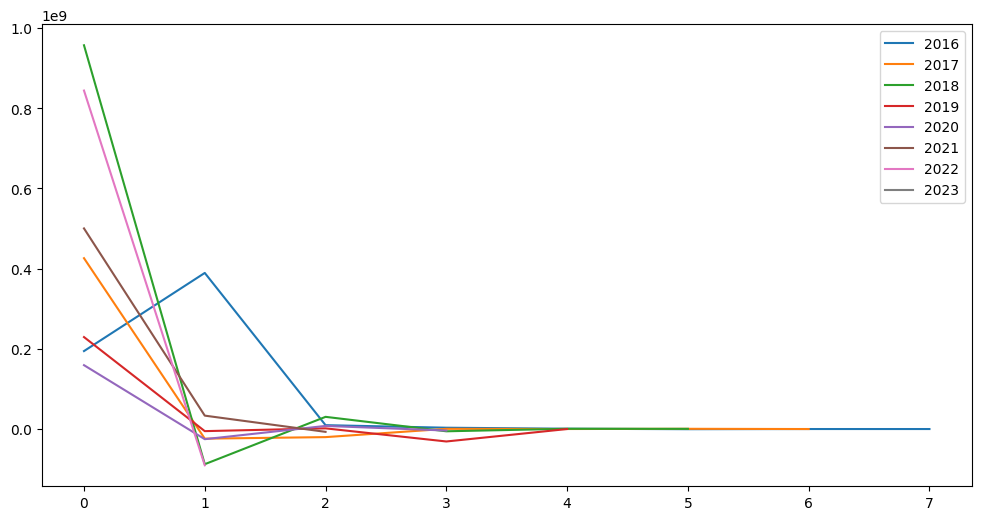

             1         2          3         4          5        6    7
2016  2.002253  0.024783   0.340584  0.233152  -0.500072 -0.05219  0.0
2017 -0.056224  0.841251  -0.025225  0.088355  13.248641  0.00000  NaN
2018 -0.091625 -0.346758  -0.184459 -0.118340   0.767746      NaN  NaN
2019 -0.022785 -0.326987 -18.159355 -0.000452        NaN      NaN  NaN
2020 -0.158902 -0.307466  -0.483395       NaN        NaN      NaN  NaN
2021  0.066812 -0.210291        NaN       NaN        NaN      NaN  NaN
2022 -0.107072       NaN        NaN       NaN        NaN      NaN  NaN
2023       NaN       NaN        NaN       NaN        NaN      NaN  NaN
                 1         2        3         4         5         6    7
Factores  0.233208 -0.054245 -3.70237  0.050679  4.505438 -0.026095  0.0
DataFrame con valores proyectados:
                0             1             2             3             4  \
2016  194439796.1  3.893176e+08  9.648652e+06  3.286180e+06  7.661783e+05   
2017  426085021.8 -2.39561

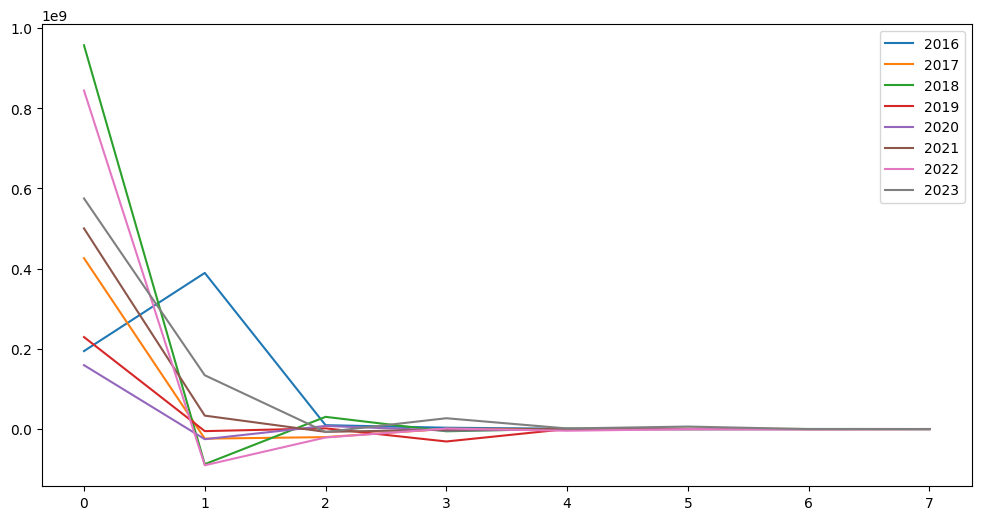

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Incendios

data = [
    [194439796.1, 389317595.1, 9648652.24, 3286179.795, 766178.34, -383143.96, 19996.33, 0],
    [426085021.8, -23956140.8, -20153127.98, 508368.4418, 44916.85036, 595087.2048, 0, np.nan],
    [957085225.3, -87692617.65, 30408155.94, -5609048.633, 663775.72, 509611.33, np.nan, np.nan],
    [229345423.3, -5225648.115, 1708719.31, -31029239.94, 14031.96, np.nan, np.nan, np.nan],
    [159279159.9, -25309744.22, 7781895.045, -3761726.33, np.nan, np.nan, np.nan, np.nan],
    [500320608.8, 33427403.77, -7029498.48, np.nan, np.nan, np.nan, np.nan, np.nan],
    [844151129.1, -90384857.58, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [575076978.3,  np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan ]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12,6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame

nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)


"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Llenado de la tabla"""

# Asumiendo que 'df_promedios' contiene los factores de desarrollo correctos
factores = df_promedios.loc['Factores'].values

# Función para aplicar los factores de desarrollo y llenar los valores faltantes
def aplicar_chain_ladder(df, factores):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        factor_index = 0
        for j in range(len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if factor_index < len(factores):
                    df_llenado.iloc[i, j] = df_llenado.iloc[i, j - 1] * factores.iloc[factor_index]
                    factor_index += 1
    return df_llenado

# Aplicar los factores de desarrollo calculados
df_llenado = aplicar_chain_ladder(df, promedios)

print("DataFrame con valores proyectados:")
print(df_llenado)

df_llenado.T.plot(figsize=(12,6))
plt.show()


##MARITIMO Y TRANSPORTE


                 0            1             2             3            4  \
2016  6.758877e+08  20894619.19 -1.450984e+07 -1.720919e+05 -20921193.45   
2017  5.819146e+08  46052779.85 -7.579096e+06 -1.155371e+06    500000.00   
2018  3.500045e+08  39582255.36 -1.165383e+07 -1.040392e+05    130714.46   
2019  5.242969e+08  22392363.39 -7.396813e+06  1.347049e+06   -119447.94   
2020  5.500590e+08  20121265.62 -4.921011e+06 -5.942651e+06          NaN   
2021  5.500590e+08  20121265.62 -4.921011e+06 -5.942651e+06          NaN   
2022  8.714454e+07  25604949.66           NaN           NaN          NaN   
2023  6.784904e+07          NaN           NaN           NaN          NaN   

                5            6           7  
2016 -3732293.286    -53143.96  6249200.08  
2017  -485625.000  29296720.03         NaN  
2018   509611.330          NaN         NaN  
2019          NaN          NaN         NaN  
2020          NaN          NaN         NaN  
2021          NaN          NaN         NaN  


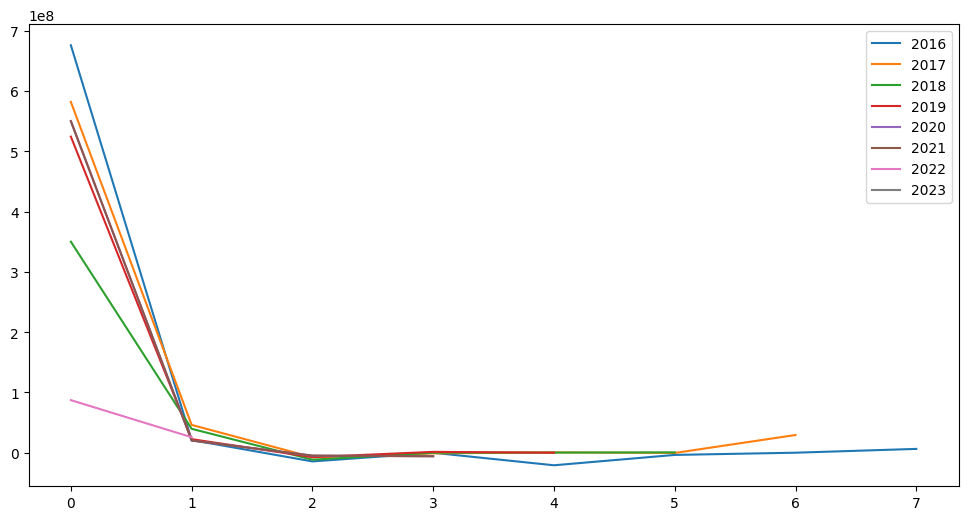

             1         2         3           4         5          6  \
2016  0.030914 -0.694429  0.011860  121.569923  0.178398   0.014239   
2017  0.079140 -0.164574  0.152442   -0.432761 -0.971250 -60.327866   
2018  0.113091 -0.294421  0.008927   -1.256396  3.898661        NaN   
2019  0.042709 -0.330327 -0.182112   -0.088674       NaN        NaN   
2020  0.036580 -0.244568  1.207608         NaN       NaN        NaN   
2021  0.036580 -0.244568  1.207608         NaN       NaN        NaN   
2022  0.293822       NaN       NaN         NaN       NaN        NaN   
2023       NaN       NaN       NaN         NaN       NaN        NaN   

               7  
2016 -117.590034  
2017         NaN  
2018         NaN  
2019         NaN  
2020         NaN  
2021         NaN  
2022         NaN  
2023         NaN  
                 1         2         3          4         5          6  \
Factores  0.090405 -0.328814  0.401055  29.948023  1.035269 -30.156814   

                   7  
Factores -117.590

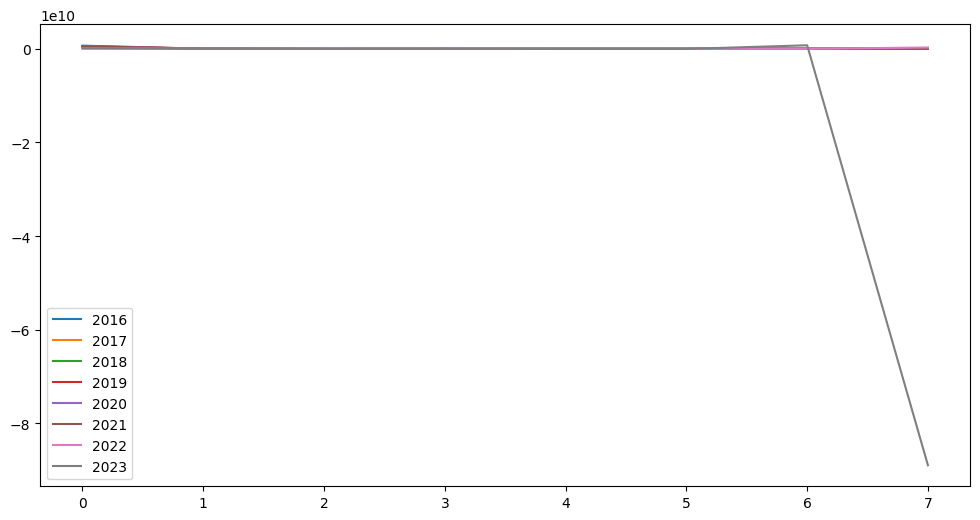

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#MARITIMO Y TRANSPORTE

data = [
    [675887653.5, 20894619.19, -14509836.17, -172091.8534, -20921193.45, -3732293.286, -53143.96, 6249200.08],
    [581914607.7, 46052779.85, -7579095.877, -1155371.304, 500000, -485625, 29296720.03, np.nan],
    [350004508.1, 39582255.36, -11653834.57, -104039.1912, 130714.46, 509611.33, np.nan, np.nan],
    [524296913.5, 22392363.39, -7396813.366, 1347048.55, -119447.94, np.nan, np.nan, np.nan],
    [550059004.2, 20121265.62, -4921011.334, -5942650.76, np.nan, np.nan, np.nan, np.nan],
    [550059004.2, 20121265.62, -4921011.334, -5942650.76, np.nan, np.nan, np.nan, np.nan],
    [87144537.54, 25604949.66, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [67849041.42, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12,6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame

nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)


"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Llenado de la tabla"""

# Asumiendo que 'df_promedios' contiene los factores de desarrollo correctos
factores = df_promedios.loc['Factores'].values

# Función para aplicar los factores de desarrollo y llenar los valores faltantes
def aplicar_chain_ladder(df, factores):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        factor_index = 0
        for j in range(len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if factor_index < len(factores):
                    df_llenado.iloc[i, j] = df_llenado.iloc[i, j - 1] * factores.iloc[factor_index]
                    factor_index += 1
    return df_llenado

# Aplicar los factores de desarrollo calculados
df_llenado = aplicar_chain_ladder(df, promedios)

print("DataFrame con valores proyectados:")
print(df_llenado)

df_llenado.T.plot(figsize=(12,6))
plt.show()

##MICELANIOS


                 0             1             2           3           4  \
2016  8.467659e+07  3.882283e+05 -1.929420e+06  2558440.34  2135535.00   
2017  6.418102e+07 -2.358885e+06  4.998908e+05    60556.03  2232442.43   
2018  8.940139e+07  4.456684e+06  4.945416e+05   125068.29     6793.18   
2019  1.173663e+08  1.771305e+07 -8.011166e+05 -1072451.90  2307266.45   
2020  7.907081e+07  3.547222e+06  7.078498e+05    46228.14         NaN   
2021  8.867860e+07  2.638011e+07 -3.390838e+06         NaN         NaN   
2022  1.546179e+08  1.202052e+07           NaN         NaN         NaN   
2023  9.660348e+07           NaN           NaN         NaN         NaN   

               5            6           7  
2016  1428186.72    -42727.45 -1425686.72  
2017   -16729.99  29296720.03         NaN  
2018      646.18          NaN         NaN  
2019         NaN          NaN         NaN  
2020         NaN          NaN         NaN  
2021         NaN          NaN         NaN  
2022         NaN         

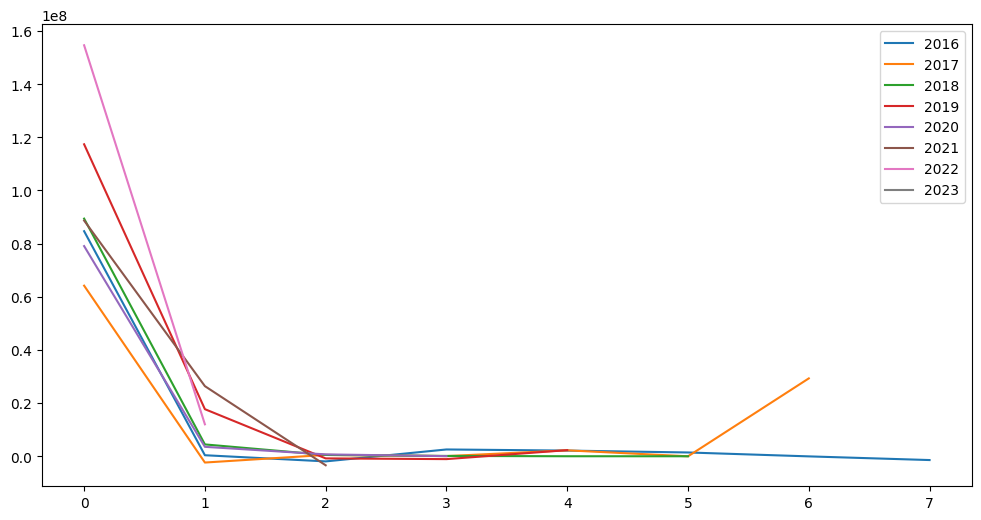

             1         2         3          4         5            6  \
2016  0.004585 -4.969806 -1.326016   0.834702  0.668772    -0.029917   
2017 -0.036754 -0.211918  0.121139  36.865733 -0.007494 -1751.149883   
2018  0.049850  0.110966  0.252897   0.054316  0.095122          NaN   
2019  0.150921 -0.045227  1.338696  -2.151394       NaN          NaN   
2020  0.044861  0.199550  0.065308        NaN       NaN          NaN   
2021  0.297480 -0.128538       NaN        NaN       NaN          NaN   
2022  0.077743       NaN       NaN        NaN       NaN          NaN   
2023       NaN       NaN       NaN        NaN       NaN          NaN   

              7  
2016  33.366998  
2017        NaN  
2018        NaN  
2019        NaN  
2020        NaN  
2021        NaN  
2022        NaN  
2023        NaN  
                 1         2         3         4         5         6  \
Factores  0.084098 -0.840829  0.090405  8.900839  0.252133 -875.5899   

                  7  
Factores  33.366998  


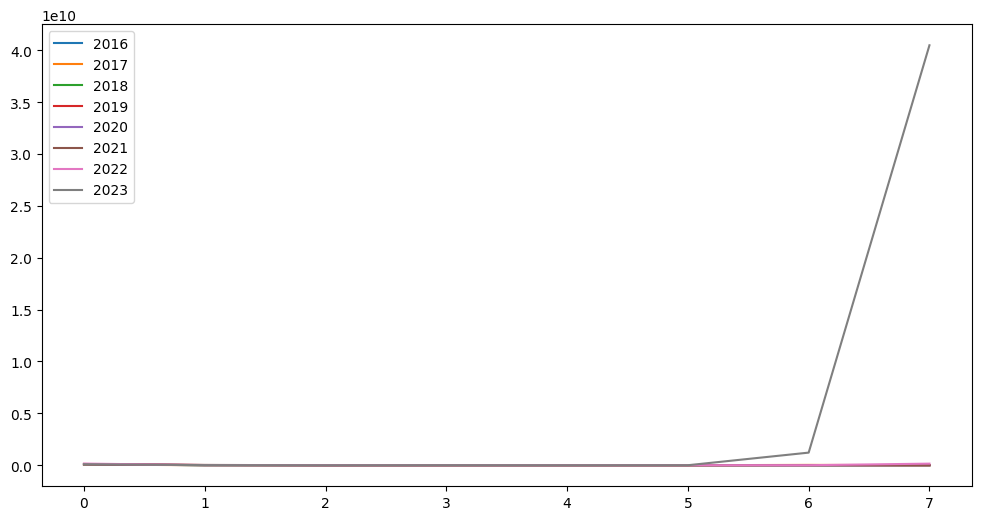

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#MICELANIOS

data = [
    [84676593.35, 388228.334, -1929419.63, 2558440.34, 2135535, 1428186.72, -42727.45, -1425686.72],
    [64181020.09, -2358884.53, 499890.7542, 60556.03, 2232442.43, -16729.99, 29296720.03, np.nan],
    [89401392.5, 4456683.553, 494541.6, 125068.29, 6793.18, 646.18, np.nan, np.nan],
    [117366330.5, 17713051.79, -801116.58, -1072451.9, 2307266.45, np.nan, np.nan, np.nan],
    [79070814.5, 3547221.91, 707849.8232, 46228.14, np.nan, np.nan, np.nan, np.nan],
    [88678596.24, 26380109, -3390837.764, np.nan, np.nan, np.nan, np.nan, np.nan],
    [154617882.1, 12020516.59, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [96603484.24, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12,6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame

nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)


"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Llenado de la tabla"""

# Asumiendo que 'df_promedios' contiene los factores de desarrollo correctos
factores = df_promedios.loc['Factores'].values

# Función para aplicar los factores de desarrollo y llenar los valores faltantes
def aplicar_chain_ladder(df, factores):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        factor_index = 0
        for j in range(len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if factor_index < len(factores):
                    df_llenado.iloc[i, j] = df_llenado.iloc[i, j - 1] * factores.iloc[factor_index]
                    factor_index += 1
    return df_llenado

# Aplicar los factores de desarrollo calculados
df_llenado = aplicar_chain_ladder(df, promedios)

print("DataFrame con valores proyectados:")
print(df_llenado)

df_llenado.T.plot(figsize=(12,6))
plt.show()

##TECNICOS


                0             1             2             3            4  \
2016  280332586.0  1.729173e+07 -3.377691e+07 -2.437285e+07  -413338.130   
2017  207134361.8 -4.315805e+07 -1.315780e+07  8.525155e+06  5052500.629   
2018  105915308.4  2.598933e+06  2.344747e+06 -4.656807e+05     2600.600   
2019  136755644.0  1.010327e+07 -5.676831e+06  7.152966e+05   -23652.330   
2020  125211652.4  2.965459e+07  4.786293e+07  1.041937e+07          NaN   
2021  156384207.7  8.460064e+05 -1.444084e+07           NaN          NaN   
2022  261817878.7  7.049838e+07           NaN           NaN          NaN   
2023  206535766.3           NaN           NaN           NaN          NaN   

                5          6    7  
2016    51234.000  510266.77  0.0  
2017 -4302500.629 -148721.91  NaN  
2018        0.000        NaN  NaN  
2019          NaN        NaN  NaN  
2020          NaN        NaN  NaN  
2021          NaN        NaN  NaN  
2022          NaN        NaN  NaN  
2023          NaN        Na

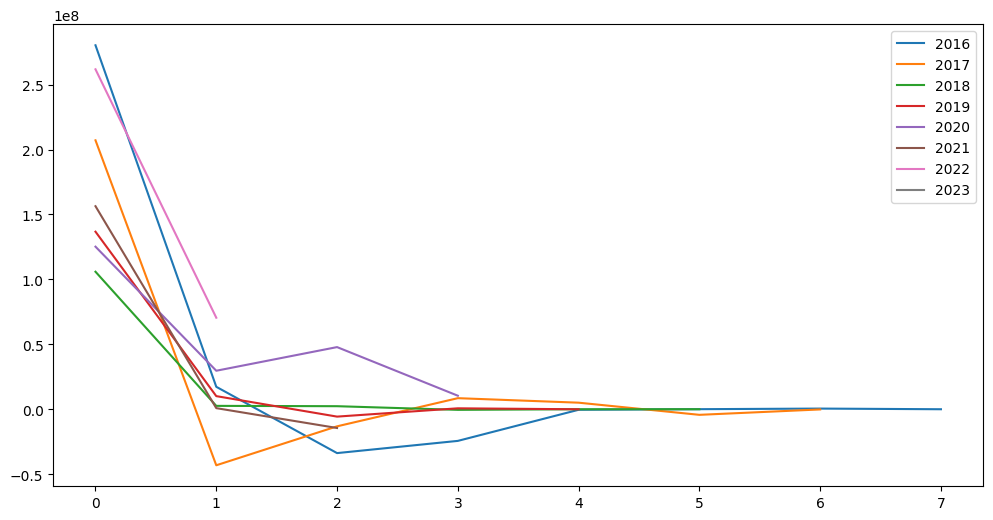

             1          2         3         4         5         6    7
2016  0.061683  -1.953356  0.721583  0.016959 -0.123952  9.959534  0.0
2017 -0.208358   0.304875 -0.647917  0.592658 -0.851559  0.034566  NaN
2018  0.024538   0.902196 -0.198606 -0.005585  0.000000       NaN  NaN
2019  0.073878  -0.561880 -0.126003 -0.033066       NaN       NaN  NaN
2020  0.236836   1.614014  0.217692       NaN       NaN       NaN  NaN
2021  0.005410 -17.069418       NaN       NaN       NaN       NaN  NaN
2022  0.269265        NaN       NaN       NaN       NaN       NaN  NaN
2023       NaN        NaN       NaN       NaN       NaN       NaN  NaN
                 1         2        3         4        5        6    7
Factores  0.066179 -2.793928 -0.00665  0.142741 -0.32517  4.99705  0.0
DataFrame con valores proyectados:
                0             1             2             3             4  \
2016  280332586.0  1.729173e+07 -3.377691e+07 -2.437285e+07 -4.133381e+05   
2017  207134361.8 -4.315805e+0

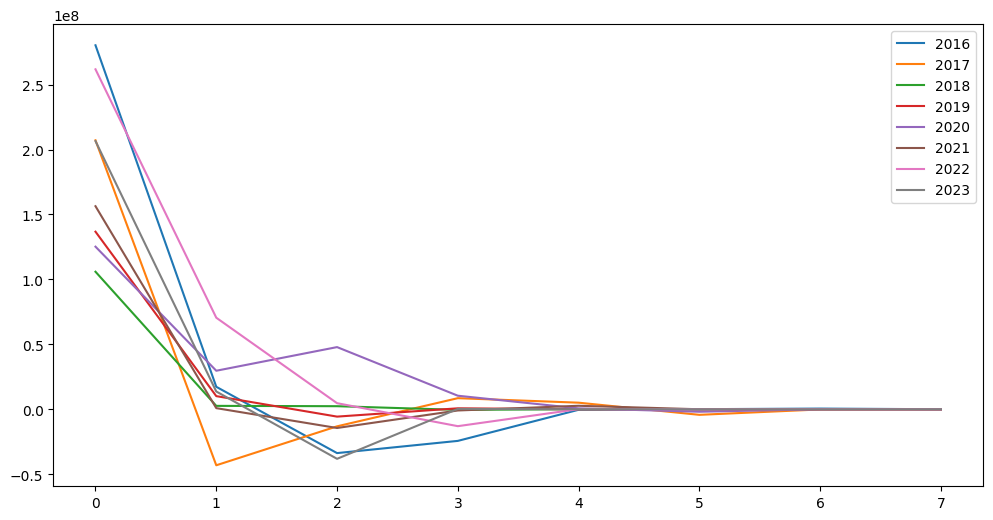

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#TECNICOS

data = [
    [280332586, 17291732.71, -33776912.64, -24372853.46, -413338.13, 51234, 510266.77, 0],
    [207134361.8, -43158047.69, -13157797.9, 8525154.56, 5052500.629, -4302500.629, -148721.91, np.nan],
    [105915308.4, 2598933.27, 2344746.78, -465680.675, 2600.6, 0, np.nan, np.nan],
    [136755644, 10103273.82, -5676831.029, 715296.606, -23652.33, np.nan, np.nan, np.nan],
    [125211652.4, 29654593.64, 47862925.26, 10419365.62, np.nan, np.nan, np.nan, np.nan],
    [156384207.7, 846006.3908, -14440836.48, np.nan, np.nan, np.nan, np.nan, np.nan],
    [261817878.7, 70498382.74, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [206535766.3, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
]
# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12,6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame

nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)


"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Llenado de la tabla"""

# Asumiendo que 'df_promedios' contiene los factores de desarrollo correctos
factores = df_promedios.loc['Factores'].values

# Función para aplicar los factores de desarrollo y llenar los valores faltantes
def aplicar_chain_ladder(df, factores):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        factor_index = 0
        for j in range(len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if factor_index < len(factores):
                    df_llenado.iloc[i, j] = df_llenado.iloc[i, j - 1] * factores.iloc[factor_index]
                    factor_index += 1
    return df_llenado

# Aplicar los factores de desarrollo calculados
df_llenado = aplicar_chain_ladder(df, promedios)

print("DataFrame con valores proyectados:")
print(df_llenado)

df_llenado.T.plot(figsize=(12,6))
plt.show()

##METODO Bühlmann-Chain Ladder


3) Con la base Siniestros IBNR deben crear una reserva IBNR bajo el método de Bühlmann-chain
Ledder, se deben de realizar 60 mil simulaciones para estimar las reservas, se tomará como
periodos de origen a la fecha de ocurrencia del siniestro y como periodos de desarrollo el registro
contable.

**RESPONSABILIDAD CIVIL**

                 0             1             2             3             4  \
2016  4.777561e+08  5.634650e+07  1.077955e+08  5.958722e+06  3.563365e+08   
2017  2.578420e+08  4.634765e+07  4.519144e+07  1.912942e+08  6.101068e+07   
2018  8.570513e+07 -9.863347e+06 -1.395144e+07  5.847085e+05  5.568911e+05   
2019  6.142800e+07 -5.146611e+06  4.247750e+06  2.630507e+07 -2.409488e+07   
2020  7.798958e+07 -1.524578e+07 -4.563860e+06  3.147436e+06           NaN   
2021  6.095664e+07 -7.421559e+06  6.900232e+06           NaN           NaN   
2022  8.714454e+07  2.560495e+07           NaN           NaN           NaN   
2023  6.784904e+07           NaN           NaN           NaN           NaN   

                5            6           7  
2016  72800187.32  96438567.29  6249200.08  
2017  35140687.53  29296720.03         NaN  
2018    509611.33          NaN         NaN  
2019          NaN          NaN         NaN  
2020          NaN          NaN         NaN  
2021          NaN          

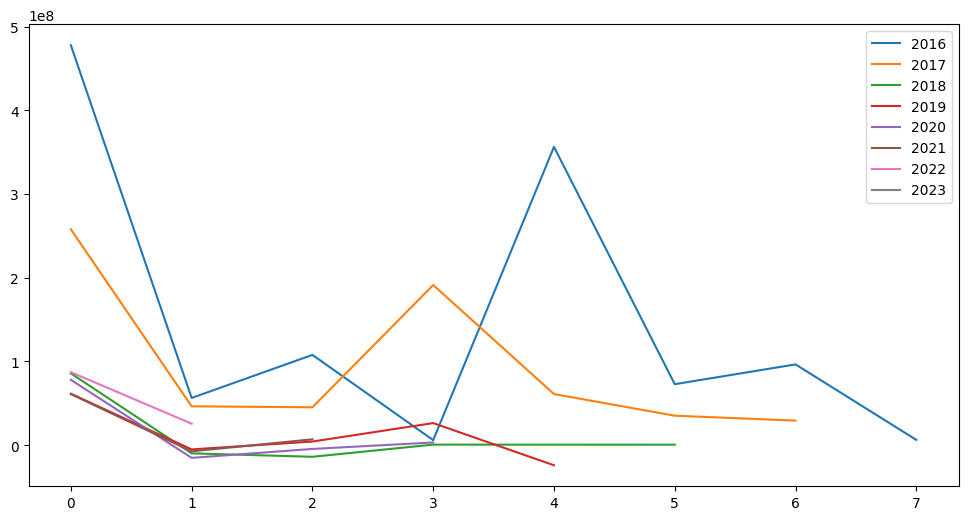

             1         2         3          4         5         6       7
2016  0.117940  1.913083  0.055278  59.800831  0.204302  1.324702  0.0648
2017  0.179752  0.975054  4.232974   0.318936  0.575976  0.833698     NaN
2018 -0.115085  1.414473 -0.041910   0.952425  0.915100       NaN     NaN
2019 -0.083783 -0.825349  6.192707  -0.915979       NaN       NaN     NaN
2020 -0.195485  0.299352 -0.689643        NaN       NaN       NaN     NaN
2021 -0.121751 -0.929755       NaN        NaN       NaN       NaN     NaN
2022  0.293822       NaN       NaN        NaN       NaN       NaN     NaN
2023       NaN       NaN       NaN        NaN       NaN       NaN     NaN
                 1         2         3          4         5       6       7
Factores  0.010773  0.474476  1.949881  15.039053  0.565126  1.0792  0.0648
DataFrame con valores proyectados usando Bühlmann-Chain Ladder:
                 0             1             2             3             4  \
2016  4.777561e+08  5.634650e+07  1.0779

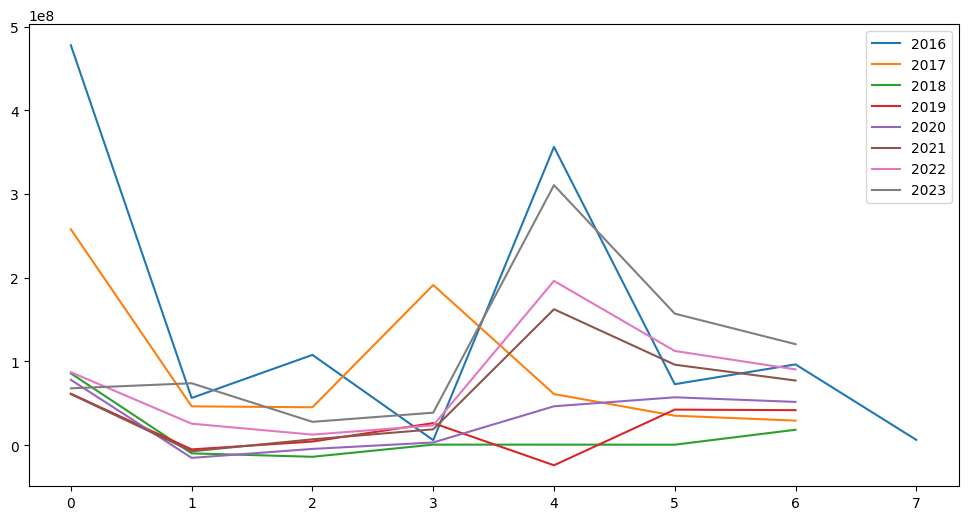

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""MODELO BÜHLMANN-CHAIN LADDER"""

# Definir los datos como una lista de listas
data = [
    [477756136.1, 56346499.45, 107795548, 5958722.317, 356336545.5, 72800187.32, 96438567.29, 6249200.08],
    [257842001.8, 46347651.12, 45191443.21, 191294213.2, 61010682.52, 35140687.53, 29296720.03, np.nan],
    [85705125.64, -9863347.049, -13951438.11, 584708.4738, 556891.13, 509611.33, np.nan, np.nan],
    [61427996.32, -5146610.562, 4247749.734, 26305068.52, -24094882.71, np.nan, np.nan, np.nan],
    [77989582.68, -15245781.8, -4563860.121, 3147435.739, np.nan, np.nan, np.nan, np.nan],
    [60956637.63, -7421558.681, 6900231.507, np.nan, np.nan, np.nan, np.nan, np.nan],
    [87144537.54, 25604949.66, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [67849041.42,  np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan ]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12,6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame
nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)

"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Llenado de la tabla usando el Modelo Bühlmann-Chain Ladder"""

# Definir los factores de desarrollo y los parámetros del modelo Bühlmann
factores = df_promedios.loc['Factores'].values
alpha = 1.0  # Factor de credibilidad Bühlmann
beta = 1.0   # Factor de ajuste Bühlmann

# Función para aplicar el modelo Bühlmann-Chain Ladder y llenar los valores faltantes
def aplicar_buhlmann_chain_ladder(df, factores, alpha, beta):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        for j in range(1, len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if j < len(factores):
                    # Estimación usando el modelo Bühlmann
                    mean_prior = df_llenado.iloc[:, j-1].mean()
                    est_futuro = (alpha * df_llenado.iloc[i, j - 1] * factores[j-1] + beta * mean_prior) / (alpha + beta)
                    df_llenado.iloc[i, j] = est_futuro
    return df_llenado

# Aplicar los factores de desarrollo calculados usando el modelo Bühlmann
df_llenado = aplicar_buhlmann_chain_ladder(df, factores, alpha, beta)

print("DataFrame con valores proyectados usando Bühlmann-Chain Ladder:")
print(df_llenado)

df_llenado.T.plot(figsize=(12,6))
plt.show()


**INCENDIO**

                0             1             2             3             4  \
2016  194439796.1  3.893176e+08  9.648652e+06  3.286180e+06  766178.34000   
2017  426085021.8 -2.395614e+07 -2.015313e+07  5.083684e+05   44916.85036   
2018  957085225.3 -8.769262e+07  3.040816e+07 -5.609049e+06  663775.72000   
2019  229345423.3 -5.225648e+06  1.708719e+06 -3.102924e+07   14031.96000   
2020  159279159.9 -2.530974e+07  7.781895e+06 -3.761726e+06           NaN   
2021  500320608.8  3.342740e+07 -7.029498e+06           NaN           NaN   
2022  844151129.1 -9.038486e+07           NaN           NaN           NaN   
2023  575076978.3           NaN           NaN           NaN           NaN   

                5         6    7  
2016 -383143.9600  19996.33  0.0  
2017  595087.2048      0.00  NaN  
2018  509611.3300       NaN  NaN  
2019          NaN       NaN  NaN  
2020          NaN       NaN  NaN  
2021          NaN       NaN  NaN  
2022          NaN       NaN  NaN  
2023          NaN       Na

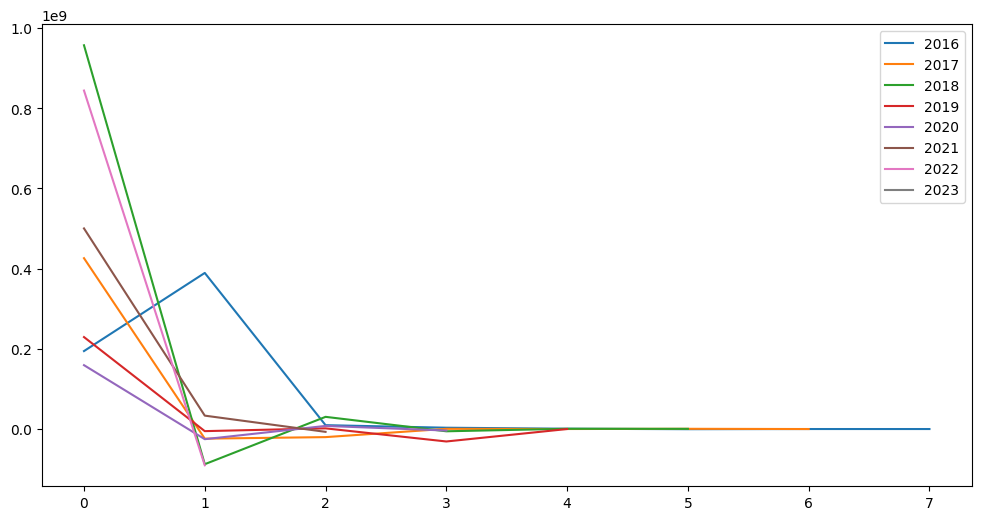

             1         2          3         4          5        6    7
2016  2.002253  0.024783   0.340584  0.233152  -0.500072 -0.05219  0.0
2017 -0.056224  0.841251  -0.025225  0.088355  13.248641  0.00000  NaN
2018 -0.091625 -0.346758  -0.184459 -0.118340   0.767746      NaN  NaN
2019 -0.022785 -0.326987 -18.159355 -0.000452        NaN      NaN  NaN
2020 -0.158902 -0.307466  -0.483395       NaN        NaN      NaN  NaN
2021  0.066812 -0.210291        NaN       NaN        NaN      NaN  NaN
2022 -0.107072       NaN        NaN       NaN        NaN      NaN  NaN
2023       NaN       NaN        NaN       NaN        NaN      NaN  NaN
                 1         2        3         4         5         6    7
Factores  0.233208 -0.054245 -3.70237  0.050679  4.505438 -0.026095  0.0
DataFrame con valores proyectados usando Bühlmann-Chain Ladder:
                0             1             2             3             4  \
2016  194439796.1  3.893176e+08  9.648652e+06  3.286180e+06  7.661783e+05 

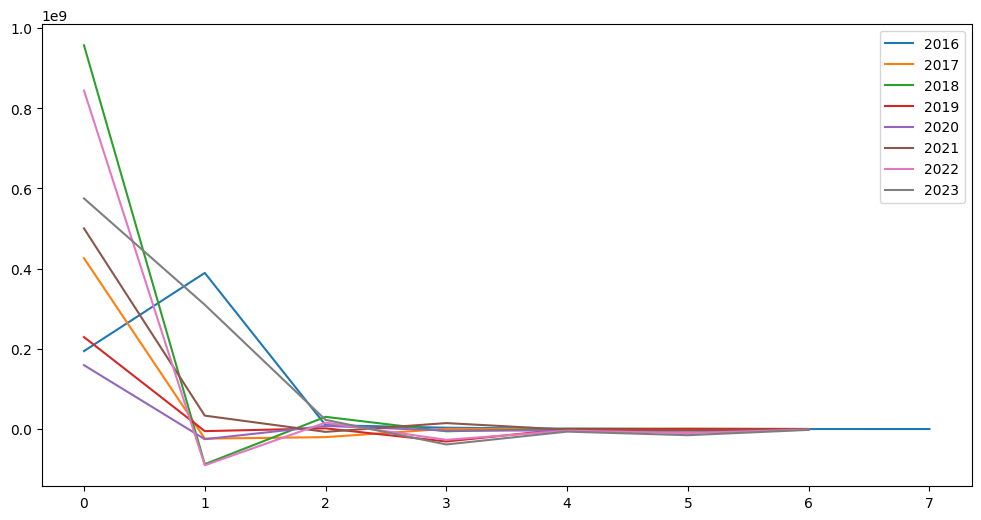

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Incendios

data = [
    [194439796.1, 389317595.1, 9648652.24, 3286179.795, 766178.34, -383143.96, 19996.33, 0],
    [426085021.8, -23956140.8, -20153127.98, 508368.4418, 44916.85036, 595087.2048, 0, np.nan],
    [957085225.3, -87692617.65, 30408155.94, -5609048.633, 663775.72, 509611.33, np.nan, np.nan],
    [229345423.3, -5225648.115, 1708719.31, -31029239.94, 14031.96, np.nan, np.nan, np.nan],
    [159279159.9, -25309744.22, 7781895.045, -3761726.33, np.nan, np.nan, np.nan, np.nan],
    [500320608.8, 33427403.77, -7029498.48, np.nan, np.nan, np.nan, np.nan],
    [844151129.1, -90384857.58, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [575076978.3, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12,6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame
nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)

"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Llenado de la tabla usando el Modelo Bühlmann-Chain Ladder"""

# Definir los factores de desarrollo y los parámetros del modelo Bühlmann
factores = df_promedios.loc['Factores'].values
alpha = 1.0  # Factor de credibilidad Bühlmann
beta = 1.0   # Factor de ajuste Bühlmann

# Función para aplicar el modelo Bühlmann-Chain Ladder y llenar los valores faltantes
def aplicar_buhlmann_chain_ladder(df, factores, alpha, beta):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        for j in range(1, len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if j < len(factores):
                    # Estimación usando el modelo Bühlmann
                    mean_prior = df_llenado.iloc[:, j-1].mean()
                    est_futuro = (alpha * df_llenado.iloc[i, j - 1] * factores[j-1] + beta * mean_prior) / (alpha + beta)
                    df_llenado.iloc[i, j] = est_futuro
    return df_llenado

# Aplicar los factores de desarrollo calculados usando el modelo Bühlmann
df_llenado = aplicar_buhlmann_chain_ladder(df, factores, alpha, beta)

print("DataFrame con valores proyectados usando Bühlmann-Chain Ladder:")
print(df_llenado)

df_llenado.T.plot(figsize=(12,6))
plt.show()


**MARITIMO Y DE TRANSPORTE**

                 0            1             2             3            4  \
2016  6.758877e+08  20894619.19 -1.450984e+07 -1.720919e+05 -20921193.45   
2017  5.819146e+08  46052779.85 -7.579096e+06 -1.155371e+06    500000.00   
2018  3.500045e+08  39582255.36 -1.165383e+07 -1.040392e+05    130714.46   
2019  5.242969e+08  22392363.39 -7.396813e+06  1.347049e+06   -119447.94   
2020  5.500590e+08  20121265.62 -4.921011e+06 -5.942651e+06          NaN   
2021  5.500590e+08  20121265.62 -4.921011e+06 -5.942651e+06          NaN   
2022  8.714454e+07  25604949.66           NaN           NaN          NaN   
2023  6.784904e+07          NaN           NaN           NaN          NaN   

                5            6           7  
2016 -3732293.286    -53143.96  6249200.08  
2017  -485625.000  29296720.03         NaN  
2018   509611.330          NaN         NaN  
2019          NaN          NaN         NaN  
2020          NaN          NaN         NaN  
2021          NaN          NaN         NaN  


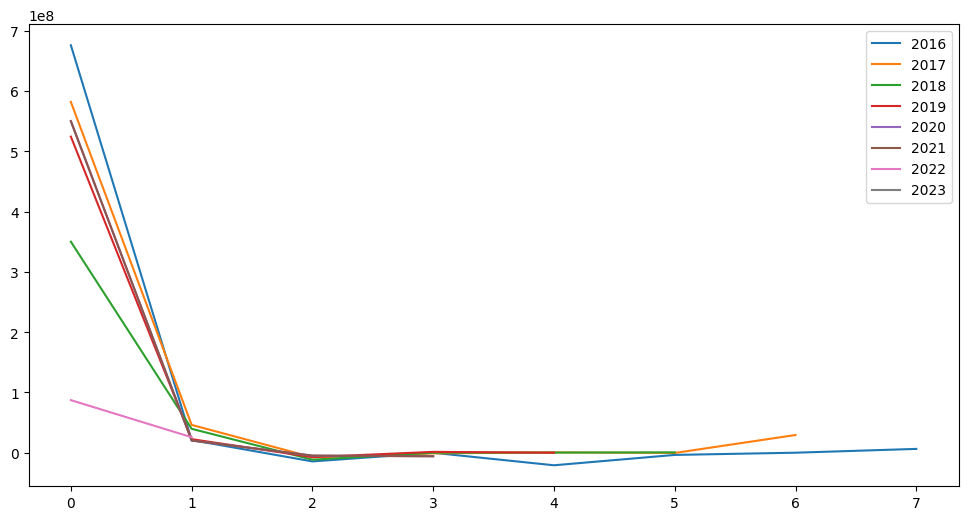

             1         2         3           4         5          6  \
2016  0.030914 -0.694429  0.011860  121.569923  0.178398   0.014239   
2017  0.079140 -0.164574  0.152442   -0.432761 -0.971250 -60.327866   
2018  0.113091 -0.294421  0.008927   -1.256396  3.898661        NaN   
2019  0.042709 -0.330327 -0.182112   -0.088674       NaN        NaN   
2020  0.036580 -0.244568  1.207608         NaN       NaN        NaN   
2021  0.036580 -0.244568  1.207608         NaN       NaN        NaN   
2022  0.293822       NaN       NaN         NaN       NaN        NaN   
2023       NaN       NaN       NaN         NaN       NaN        NaN   

               7  
2016 -117.590034  
2017         NaN  
2018         NaN  
2019         NaN  
2020         NaN  
2021         NaN  
2022         NaN  
2023         NaN  
                 1         2         3          4         5          6  \
Factores  0.090405 -0.328814  0.401055  29.948023  1.035269 -30.156814   

                   7  
Factores -117.590

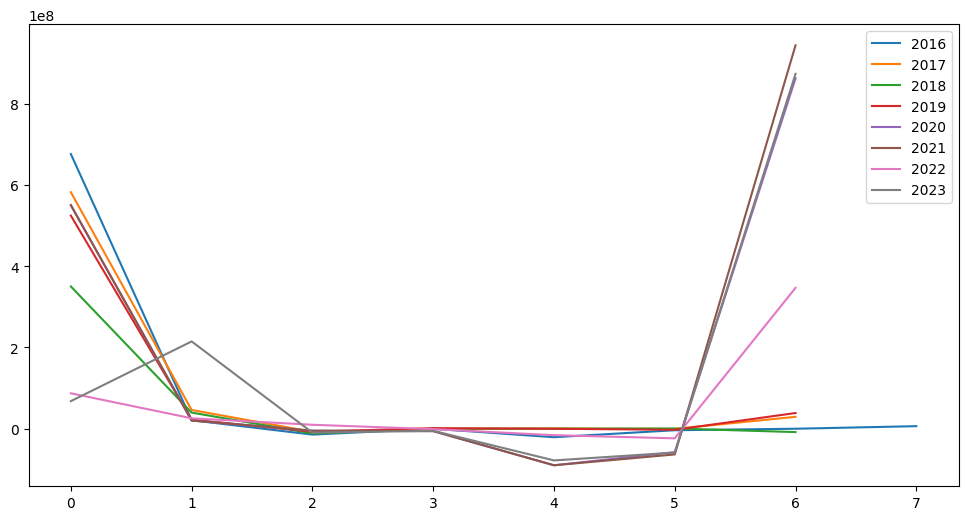

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MARÍTIMO Y TRANSPORTE

data = [
    [675887653.5, 20894619.19, -14509836.17, -172091.8534, -20921193.45, -3732293.286, -53143.96, 6249200.08],
    [581914607.7, 46052779.85, -7579095.877, -1155371.304, 500000, -485625, 29296720.03, np.nan],
    [350004508.1, 39582255.36, -11653834.57, -104039.1912, 130714.46, 509611.33, np.nan, np.nan],
    [524296913.5, 22392363.39, -7396813.366, 1347048.55, -119447.94, np.nan, np.nan, np.nan],
    [550059004.2, 20121265.62, -4921011.334, -5942650.76, np.nan, np.nan, np.nan, np.nan],
    [550059004.2, 20121265.62, -4921011.334, -5942650.76, np.nan, np.nan, np.nan, np.nan],
    [87144537.54, 25604949.66, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [67849041.42, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12,6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame
nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)

"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Llenado de la tabla usando el Modelo Bühlmann-Chain Ladder"""

# Definir los factores de desarrollo y los parámetros del modelo Bühlmann
factores = df_promedios.loc['Factores'].values
alpha = 1.0  # Factor de credibilidad Bühlmann
beta = 1.0   # Factor de ajuste Bühlmann

# Función para aplicar el modelo Bühlmann-Chain Ladder y llenar los valores faltantes
def aplicar_buhlmann_chain_ladder(df, factores, alpha, beta):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        for j in range(1, len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if j < len(factores):
                    # Estimación usando el modelo Bühlmann
                    mean_prior = df_llenado.iloc[:, j-1].mean()
                    est_futuro = (alpha * df_llenado.iloc[i, j - 1] * factores[j-1] + beta * mean_prior) / (alpha + beta)
                    df_llenado.iloc[i, j] = est_futuro
    return df_llenado

# Aplicar los factores de desarrollo calculados usando el modelo Bühlmann
df_llenado = aplicar_buhlmann_chain_ladder(df, factores, alpha, beta)

print("DataFrame con valores proyectados usando Bühlmann-Chain Ladder:")
print(df_llenado)

df_llenado.T.plot(figsize=(12,6))
plt.show()


**MICELANIOS**

                 0             1             2           3           4  \
2016  8.467659e+07  3.882283e+05 -1.929420e+06  2558440.34  2135535.00   
2017  6.418102e+07 -2.358885e+06  4.998908e+05    60556.03  2232442.43   
2018  8.940139e+07  4.456684e+06  4.945416e+05   125068.29     6793.18   
2019  1.173663e+08  1.771305e+07 -8.011166e+05 -1072451.90  2307266.45   
2020  7.907081e+07  3.547222e+06  7.078498e+05    46228.14         NaN   
2021  8.867860e+07  2.638011e+07 -3.390838e+06         NaN         NaN   
2022  1.546179e+08  1.202052e+07           NaN         NaN         NaN   
2023  9.660348e+07           NaN           NaN         NaN         NaN   

               5            6           7  
2016  1428186.72    -42727.45 -1425686.72  
2017   -16729.99  29296720.03         NaN  
2018      646.18          NaN         NaN  
2019         NaN          NaN         NaN  
2020         NaN          NaN         NaN  
2021         NaN          NaN         NaN  
2022         NaN         

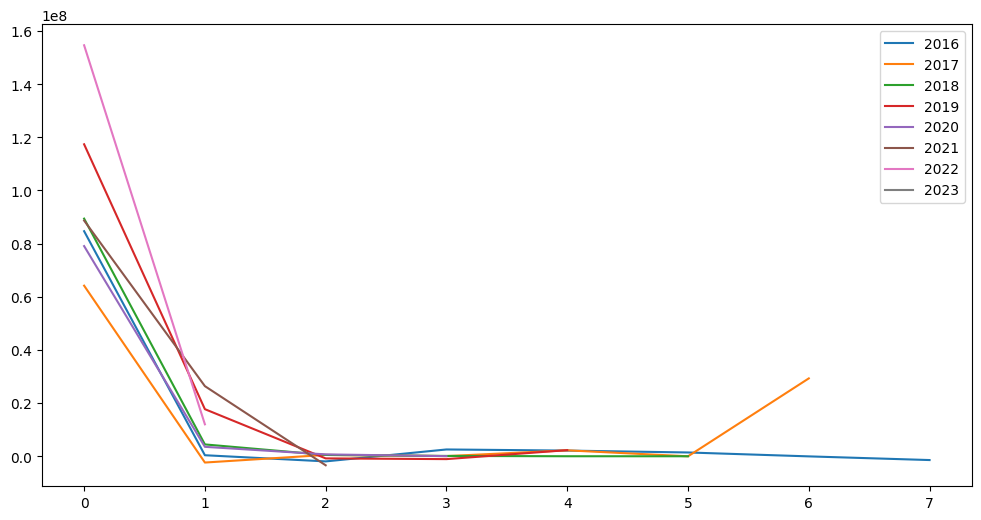

             1         2         3          4         5            6  \
2016  0.004585 -4.969806 -1.326016   0.834702  0.668772    -0.029917   
2017 -0.036754 -0.211918  0.121139  36.865733 -0.007494 -1751.149883   
2018  0.049850  0.110966  0.252897   0.054316  0.095122          NaN   
2019  0.150921 -0.045227  1.338696  -2.151394       NaN          NaN   
2020  0.044861  0.199550  0.065308        NaN       NaN          NaN   
2021  0.297480 -0.128538       NaN        NaN       NaN          NaN   
2022  0.077743       NaN       NaN        NaN       NaN          NaN   
2023       NaN       NaN       NaN        NaN       NaN          NaN   

              7  
2016  33.366998  
2017        NaN  
2018        NaN  
2019        NaN  
2020        NaN  
2021        NaN  
2022        NaN  
2023        NaN  
                 1         2         3         4         5         6  \
Factores  0.084098 -0.840829  0.090405  8.900839  0.252133 -875.5899   

                  7  
Factores  33.366998  


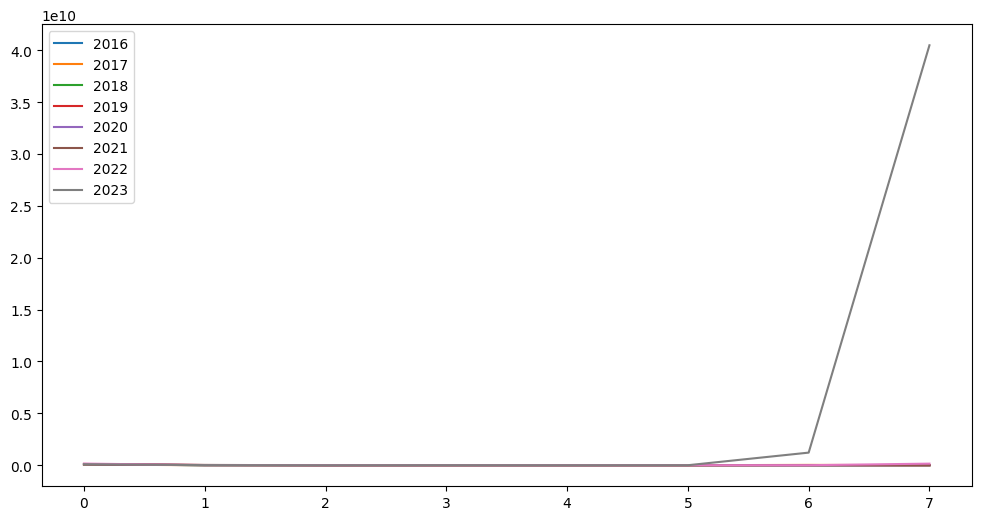

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# MICELANEOS
# Datos de los ramos
data = [
    [84676593.35, 388228.334, -1929419.63, 2558440.34, 2135535, 1428186.72, -42727.45, -1425686.72],
    [64181020.09, -2358884.53, 499890.7542, 60556.03, 2232442.43, -16729.99, 29296720.03, np.nan],
    [89401392.5, 4456683.553, 494541.6, 125068.29, 6793.18, 646.18, np.nan, np.nan],
    [117366330.5, 17713051.79, -801116.58, -1072451.9, 2307266.45, np.nan, np.nan, np.nan],
    [79070814.5, 3547221.91, 707849.8232, 46228.14, np.nan, np.nan, np.nan, np.nan],
    [88678596.24, 26380109, -3390837.764, np.nan, np.nan, np.nan, np.nan, np.nan],
    [154617882.1, 12020516.59, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [96603484.24, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12, 6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame
nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)

"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Aplicación del modelo Bühlmann-Chain Ladder"""

# Cálculo de los parámetros Bühlmann-Straub
def calcular_parametros_buhlmann(df):
    C = df.sum().sum()
    E = df.count().sum()
    alpha = (df.mean(axis=1) / df.mean(axis=1).mean()).mean()
    beta = (1 - alpha) / alpha
    return alpha, beta

# Cálculo de los factores ajustados
def calcular_factores_ajustados(df, alpha, beta):
    factores_ajustados = (df.mean(axis=0) * alpha + beta) / (alpha + beta)
    return factores_ajustados

# Cálculo de los parámetros
alpha, beta = calcular_parametros_buhlmann(df)

# Cálculo de los factores ajustados
factores_ajustados = calcular_factores_ajustados(nuevo_df, alpha, beta)

# Creación del DataFrame con los factores ajustados
df_factores_ajustados = pd.DataFrame([factores_ajustados.values], columns=factores_ajustados.index, index=["Factores Ajustados"])

print(df_factores_ajustados)

"""Llenado de la tabla"""

# Función para aplicar los factores ajustados y llenar los valores faltantes
def aplicar_buhlmann_chain_ladder(df, factores_ajustados):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        factor_index = 0
        for j in range(len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if factor_index < len(factores_ajustados):
                    df_llenado.iloc[i, j] = df_llenado.iloc[i, j - 1] * factores_ajustados.iloc[factor_index]
                    factor_index += 1
    return df_llenado

# Aplicar los factores ajustados calculados
df_llenado = aplicar_buhlmann_chain_ladder(df, factores_ajustados)

print("DataFrame con valores proyectados utilizando el modelo Bühlmann-Chain Ladder:")
print(df_llenado)

df_llenado.T.plot(figsize=(12, 6))
plt.show()


**TECNICO**


                0             1             2             3            4  \
2016  280332586.0  1.729173e+07 -3.377691e+07 -2.437285e+07  -413338.130   
2017  207134361.8 -4.315805e+07 -1.315780e+07  8.525155e+06  5052500.629   
2018  105915308.4  2.598933e+06  2.344747e+06 -4.656807e+05     2600.600   
2019  136755644.0  1.010327e+07 -5.676831e+06  7.152966e+05   -23652.330   
2020  125211652.4  2.965459e+07  4.786293e+07  1.041937e+07          NaN   
2021  156384207.7  8.460064e+05 -1.444084e+07           NaN          NaN   
2022  261817878.7  7.049838e+07           NaN           NaN          NaN   
2023  206535766.3           NaN           NaN           NaN          NaN   

                5          6    7  
2016    51234.000  510266.77  0.0  
2017 -4302500.629 -148721.91  NaN  
2018        0.000        NaN  NaN  
2019          NaN        NaN  NaN  
2020          NaN        NaN  NaN  
2021          NaN        NaN  NaN  
2022          NaN        NaN  NaN  
2023          NaN        Na

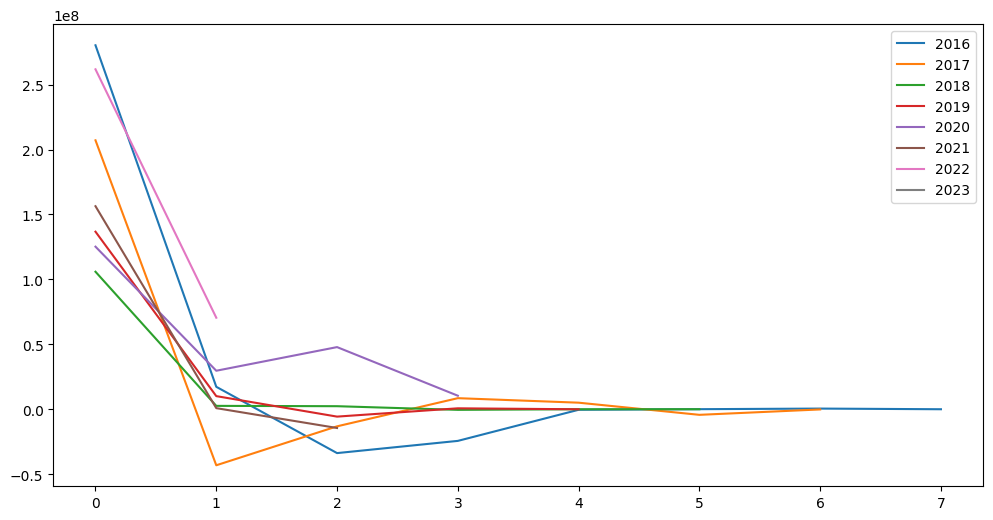

             1          2         3         4         5         6    7
2016  0.061683  -1.953356  0.721583  0.016959 -0.123952  9.959534  0.0
2017 -0.208358   0.304875 -0.647917  0.592658 -0.851559  0.034566  NaN
2018  0.024538   0.902196 -0.198606 -0.005585  0.000000       NaN  NaN
2019  0.073878  -0.561880 -0.126003 -0.033066       NaN       NaN  NaN
2020  0.236836   1.614014  0.217692       NaN       NaN       NaN  NaN
2021  0.005410 -17.069418       NaN       NaN       NaN       NaN  NaN
2022  0.269265        NaN       NaN       NaN       NaN       NaN  NaN
2023       NaN        NaN       NaN       NaN       NaN       NaN  NaN
                 1         2        3         4        5        6    7
Factores  0.066179 -2.793928 -0.00665  0.142741 -0.32517  4.99705  0.0
                           1         2        3         4        5        6  \
Factores Ajustados  0.066179 -2.793928 -0.00665  0.142741 -0.32517  4.99705   

                      7  
Factores Ajustados  0.0  
DataFram

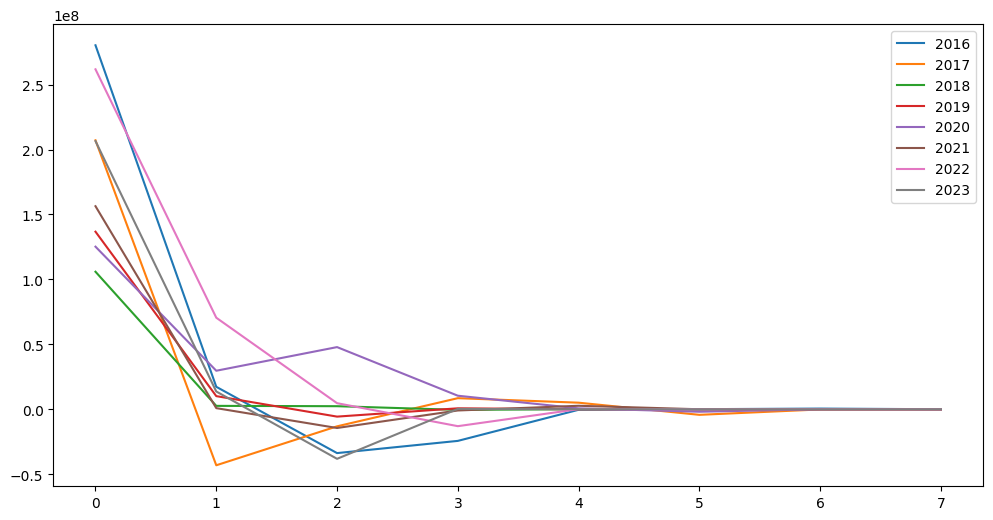

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TECNICOS
# Datos de los ramos
data = [
    [280332586, 17291732.71, -33776912.64, -24372853.46, -413338.13, 51234, 510266.77, 0],
    [207134361.8, -43158047.69, -13157797.9, 8525154.56, 5052500.629, -4302500.629, -148721.91, np.nan],
    [105915308.4, 2598933.27, 2344746.78, -465680.675, 2600.6, 0, np.nan, np.nan],
    [136755644, 10103273.82, -5676831.029, 715296.606, -23652.33, np.nan, np.nan, np.nan],
    [125211652.4, 29654593.64, 47862925.26, 10419365.62, np.nan, np.nan, np.nan, np.nan],
    [156384207.7, 846006.3908, -14440836.48, np.nan, np.nan, np.nan, np.nan, np.nan],
    [261817878.7, 70498382.74, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    [206535766.3, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
]

# Definir los índices de las filas
index = list(range(2016, 2024))

# Definir los nombres de las columnas
columns = [i for i in range(0, 8)]

# Crear el DataFrame
df = pd.DataFrame(data, index=index, columns=columns)

print(df)

df.T.plot(figsize=(12, 6))
plt.show()

"""Factores de Desarrollo"""

# Definir una función que realice las operaciones requeridas
def calcular_operaciones(fila):
    operaciones = []
    for i in range(1, len(fila)):
        if not np.isnan(fila[i]) and not np.isnan(fila[i - 1]):
            resultado = fila[i] / fila[i - 1]
            operaciones.append(resultado)
        else:
            operaciones.append(np.nan)
    return operaciones

# Aplicar la función a cada fila del DataFrame
nuevos_datos = df.apply(calcular_operaciones, axis=1)

# Crear un nuevo DataFrame con los resultados
nuevo_df = pd.DataFrame(nuevos_datos.values.tolist(), index=df.index, columns=[f'{i}' for i in range(1, len(df.columns))])

print(nuevo_df)

"""Factores por Promedio"""

promedios = nuevo_df.mean(axis=0)

df_promedios = pd.DataFrame([promedios.values], columns=promedios.index, index=["Factores"])

print(df_promedios)

"""Aplicación del modelo Bühlmann-Chain Ladder"""

# Cálculo de los parámetros Bühlmann-Straub
def calcular_parametros_buhlmann(df):
    C = df.sum().sum()
    E = df.count().sum()
    alpha = (df.mean(axis=1) / df.mean(axis=1).mean()).mean()
    beta = (1 - alpha) / alpha
    return alpha, beta

# Cálculo de los factores ajustados
def calcular_factores_ajustados(df, alpha, beta):
    factores_ajustados = (df.mean(axis=0) * alpha + beta) / (alpha + beta)
    return factores_ajustados

# Cálculo de los parámetros
alpha, beta = calcular_parametros_buhlmann(df)

# Cálculo de los factores ajustados
factores_ajustados = calcular_factores_ajustados(nuevo_df, alpha, beta)

# Creación del DataFrame con los factores ajustados
df_factores_ajustados = pd.DataFrame([factores_ajustados.values], columns=factores_ajustados.index, index=["Factores Ajustados"])

print(df_factores_ajustados)

"""Llenado de la tabla"""

# Función para aplicar los factores ajustados y llenar los valores faltantes
def aplicar_buhlmann_chain_ladder(df, factores_ajustados):
    df_llenado = df.copy()
    for i in range(len(df_llenado)):
        factor_index = 0
        for j in range(len(df_llenado.columns)):
            if pd.isna(df_llenado.iloc[i, j]):
                if factor_index < len(factores_ajustados):
                    df_llenado.iloc[i, j] = df_llenado.iloc[i, j - 1] * factores_ajustados.iloc[factor_index]
                    factor_index += 1
    return df_llenado

# Aplicar los factores ajustados calculados
df_llenado = aplicar_buhlmann_chain_ladder(df, factores_ajustados)

print("DataFrame con valores proyectados utilizando el modelo Bühlmann-Chain Ladder:")
print(df_llenado)

df_llenado.T.plot(figsize=(12, 6))
plt.show()
